# **Project:  PC Video Game Recommendation System**

**Name**: N V Abhiram Naidu Kankipati

**Email**: nkank001@odu.edu

**Portifolio**: https://www.cs.odu.edu/~nkankipa/            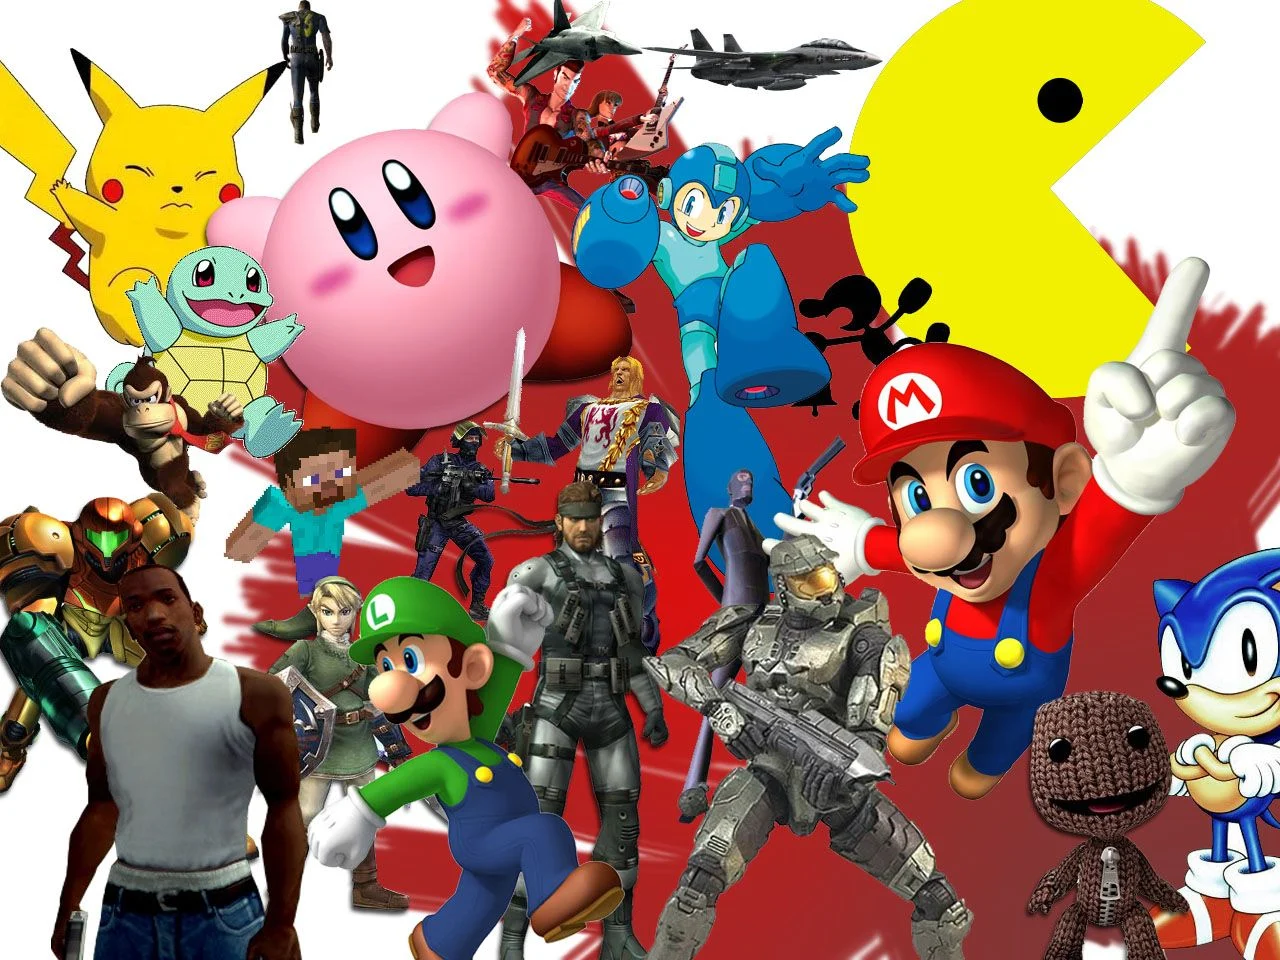


# **Abstract**

# **Introduction**

Video games are one of the main sources of entertainment for billions of people worldwide. They provide relief from stress and currently one of the best ways for social interaction. They need high human interaction and currently, education and medical sectors are using video games to educate students and interactive therapy sessions for patients respectively. 

As per theGamer and ESA, the video game industry has been growing stronger even in pandemic period 
"At a time of financial uncertainty, the gaming sector has provided a significant boost to the US economy. A new study from the Entertainment Software Association (ESA) revealed that the video game industry generated $90.3 billion in annual economic output and supported an estimated 429,000 jobs nationwide."

Selecting a game is a difficult task, you need to check on many variables and there are thousands of games to choose for. We will be wasting time by going through articles, reviews, gameplays of several games, etc before choosing a game. After completing a game of a specific genre like a role-playing FPS you either like to play similar kinds of games or go for trending games then. This recommendation model is for both categories of gamers so that you do not waste time deciding on a game instead spend on enjoying that game.

### **Problem Statement:**


To select a video game based on gameplay and experience which may feel similar to previously played game.




### **Process**:

 I would like to perform the follow steps in the process as follows:

*   Data Collection/Extraction
*   Data cleaning and preprocessing
*   Exploratory Data Analysis
*   Data Visualization
*   Recommendation System







## **Data Source**

**Primary Dataset:**
Will be extracting data from below 27 wikipedia pages and convert into single csv file

https://en.wikipedia.org/wiki/List_of_PC_games_(A)

https://en.wikipedia.org/wiki/List_of_PC_games_(B)

https://en.wikipedia.org/wiki/List_of_PC_games_(C)

...

https://en.wikipedia.org/wiki/List_of_PC_games_(Z)

https://en.wikipedia.org/wiki/List_of_PC_games_(Numerical)

The resulting dataset will contain columns like Title, Platform, Genre, Date released, Developer and Publisher.
By using data from Wikipedia, it will be updated regularly.

**Secondary Dataset:**
Secondary Dataset Will be taken from this [https://openedxvideosa.blob.core.chinacloudapi.cn/videos/MicroMOOC/datasets/MMC_VedioGame/vgsales.csv ](https://openedxvideosa.blob.core.chinacloudapi.cn/videos/MicroMOOC/datasets/MMC_VedioGame/vgsales.csv). This Dataset contains columns related to sales of videogames regionwise from 1980 to 2020 along with Titles and Genres for all gaming platforms. 

# **Attributes**


**Title:** This attribute contains name of the games present in the dataset. Sometimes it will contain a slogan or tagline

**Genre:** It refers to a particular type, style or based on their gameplay of a game. 

**Operating systems:** It gives information of various operating systems platforms a video game supports like windows, ubuntu, MacOS, etc

**Release Date:** It denotes the date on which a video game gets released to public on various platforms

**Publisher:** A video game publisher is a company that finances the design, development, marketing, and distribution of a video game.

**Developer:** This attribute contains either developers who creates games or developer studio who pays a group of developers for creating or developing a game.

# **Importing and Downloading modules**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import mlab
import matplotlib.pyplot as plt
import datetime as dt
from wordcloud import WordCloud
import nltk
#nltk.download('punkt')
#nltk.download("all")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import FileLink, FileLinks

# **Primary Dataset**

**Data Extraction from wikipedia**

In [2]:

K= chr
game_A = pd.read_html("http://wikipedia.org/wiki/List_of_PC_games_(Numerical)")
data = game_A[0]
for K in range(ord('A'), ord('Z') + 1):
    link= ('http://wikipedia.org/wiki/List_of_PC_games_('+chr(K)+')')
    gamedata = pd.read_html(link)
    print('Extracting from : '+link+' Type: ',type(gamedata[0]))
    data = data.append(pd.DataFrame(gamedata[0]),  ignore_index=True)
print(data)
# from google.colab import data_table
# data.to_csv("data.csv",index=False)


Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(A) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(B) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(C) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(D) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(E) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(F) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(G) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(H) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(I) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting

**Checking dataframe information**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                73 non-null     object
 1   Developer            1057 non-null   object
 2   Publisher            895 non-null    object
 3   Genre(s)             1056 non-null   object
 4   Operating system(s)  1052 non-null   object
 5   Date released        1049 non-null   object
 6   Name                 985 non-null    object
 7   Producer             153 non-null    object
dtypes: object(8)
memory usage: 66.2+ KB


Dataset contains 8 columns, in that **"Title"**, **"Name"**  and **"Publisher"**, **"Producer"** denotes same objects.

Merging  **"Name"** into **"Title"** whenever its null, similarly merging **"Publisher"** into **"Producer"**.

In [4]:
data["Title"] = np.where(data["Title"].isna(),data["Name"],data["Title"]).astype("str")
data =data.drop("Name",axis=1)
data["Publisher"] = np.where(data["Publisher"].isna(),data["Producer"],data["Publisher"]).astype("str")
data =data.drop("Producer",axis=1)
data

Title  ...       Date released
0                    _summer  ...       July 15, 2005
1                     0 A.D.  ...     August 16, 2010
2                007 Legends  ...    November 2, 2012
3       007: Licence to Kill  ...      April 20, 1989
4     007: Quantum of Solace  ...    October 31, 2008
...                      ...  ...                 ...
1053              Zup! Arena  ...    December 3, 2018
1054                  Zup! X  ...        May 17, 2018
1055               Zup! Zero  ...       April 6, 2017
1056             Zup! Zero 2  ...  September 11, 2018
1057                     ZZT  ...        October 1991

[1058 rows x 6 columns]

**checking dataframe information after correcting columns.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                1058 non-null   object
 1   Developer            1057 non-null   object
 2   Publisher            1058 non-null   object
 3   Genre(s)             1056 non-null   object
 4   Operating system(s)  1052 non-null   object
 5   Date released        1049 non-null   object
dtypes: object(6)
memory usage: 49.7+ KB


Current data contains few null items. So removing them to make data into structured form.

In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1057
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                1044 non-null   object
 1   Developer            1044 non-null   object
 2   Publisher            1044 non-null   object
 3   Genre(s)             1044 non-null   object
 4   Operating system(s)  1044 non-null   object
 5   Date released        1044 non-null   object
dtypes: object(6)
memory usage: 57.1+ KB


Now Dataframe information contains structured data of required columns.

**Displaying first 10 entries of dataframe**

In [8]:
data.head(10)

Title  ...     Date released
0                                  _summer  ...     July 15, 2005
1                                   0 A.D.  ...   August 16, 2010
2                              007 Legends  ...  November 2, 2012
3                     007: Licence to Kill  ...    April 20, 1989
4                   007: Quantum of Solace  ...  October 31, 2008
5                       1-0 Soccer Manager  ...              1992
6  101 Dalmatians: Escape from DeVil Manor  ...              1997
7    102 Dalmatians: Puppies to the Rescue  ...              2000
8                               10th Frame  ...              1986
9                                      140  ...  October 16, 2013

[10 rows x 6 columns]

**Using describe() to show unique items and frequency of top item in each column.**

In [9]:
data.describe()

Title Developer  ... Operating system(s) Date released
count            1044      1044  ...                1044          1044
unique           1043       571  ...                 197           874
top     A Hat in Time     Maxis  ...   Microsoft Windows          1995
freq                2        30  ...                 464             8

[4 rows x 6 columns]

**Verifying that there is no null value.**

In [10]:
data.isnull()

Title  Developer  Publisher  Genre(s)  Operating system(s)  Date released
0     False      False      False     False                False          False
1     False      False      False     False                False          False
2     False      False      False     False                False          False
3     False      False      False     False                False          False
4     False      False      False     False                False          False
...     ...        ...        ...       ...                  ...            ...
1053  False      False      False     False                False          False
1054  False      False      False     False                False          False
1055  False      False      False     False                False          False
1056  False      False      False     False                False          False
1057  False      False      False     False                False          False

[1044 rows x 6 columns]

In [11]:
data.isnull().any()

Title                  False
Developer              False
Publisher              False
Genre(s)               False
Operating system(s)    False
Date released          False
dtype: bool

## **Data Analysis**

### **To Analyse which Studio Published more PC games**

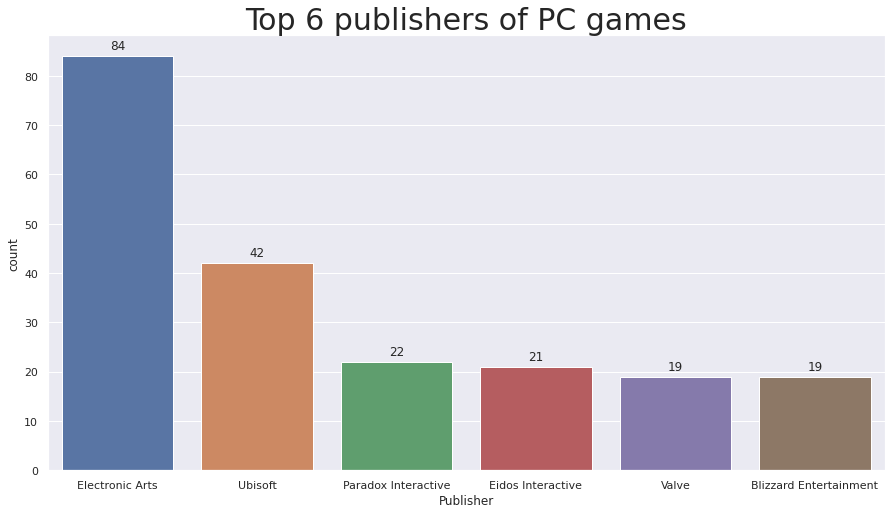

In [12]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
ax=sns.countplot(x = "Publisher", order=data['Publisher'].value_counts().index[0:6] ,data=data)
plt.title('Top 6 publishers of PC games',
         fontsize =30 
         )
for p in ax.patches:
 ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



**Observation:** As per above plot Electronic Arts had published 84 PC games and Ubisoft had published 42 games exactly half of its competitor. And there are total 475 publishers for PC video games, in that top 6 publishers contribute 20% of the all PC video games released.



### **To Analyse PC games released per genre.**

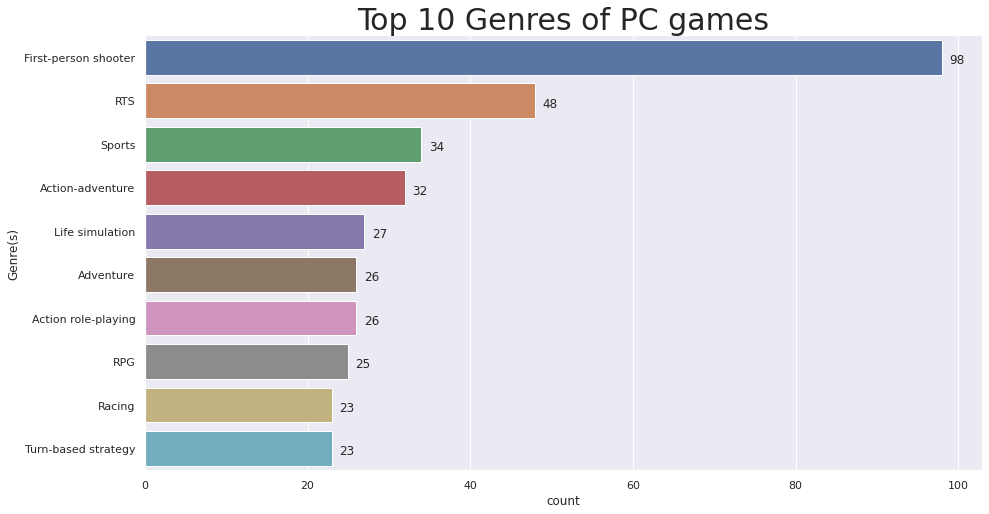

In [13]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
ax=sns.countplot(y = "Genre(s)", order=data['Genre(s)'].value_counts().index[0:10] ,data=data)
plt.title('Top 10 Genres of PC games',
         fontsize =30 
         )
for p in ax.patches:
 ax.annotate(format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), ha = 'center', va = 'center', xytext = (15,-20), textcoords = 'offset points')



In [14]:
import pandas as pd

Genre=data["Genre(s)"]
Genre=Genre.value_counts()
Genre1= Genre[:5].copy()
Genre2=pd.DataFrame([[Genre[5:].sum()]])
Genre3=pd.concat([Genre1,Genre2],axis=0)
Genre3= Genre3.rename(index={0: 'Others'})
Genre3

0
First-person shooter   98
RTS                    48
Sports                 34
Action-adventure       32
Life simulation        27
Others                805

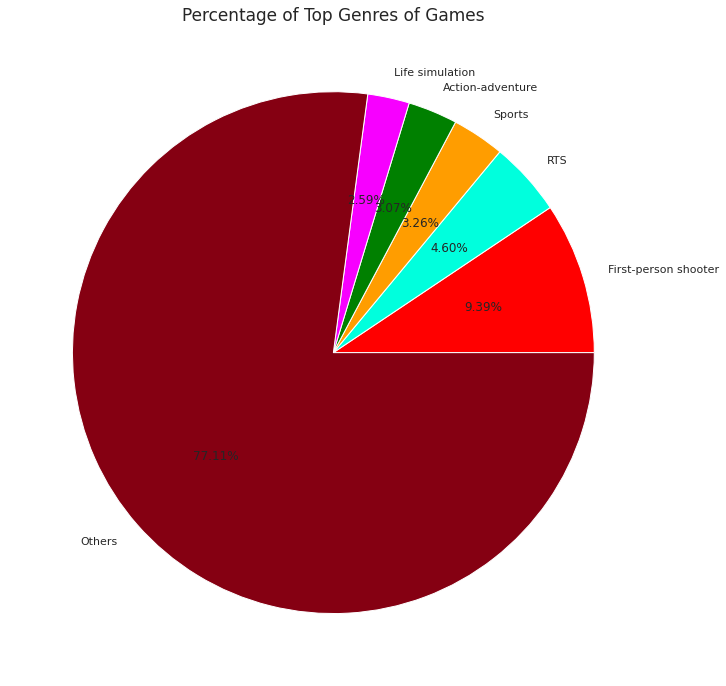

In [15]:
plt.figure(figsize = (25,12))
Genre=Genre3
labels = Genre.index
colors = ["Red","#00ffdd","#ff9d00","Green","#f700ff","#850012"]
plt.pie(Genre,explode=None,labels = labels,colors = colors,autopct = "%.2f%%") 
plt.title("Percentage of Top Genres of Games",fontdict = {"fontsize":17})
plt.savefig("Top Genres Chart",dpi = 200)
plt.show()

**Observation:** First person shooters are clearly dominating in genre specific games. One tenth of the games in dataset belong to first person shooter(FPS). Out of 277 unique genres, one-fourth of total games belong to top 5 genres(i.e: FPS, RTS, Sports, Action-Adventure and Simulation)

### **To Analyse top developers in the game**

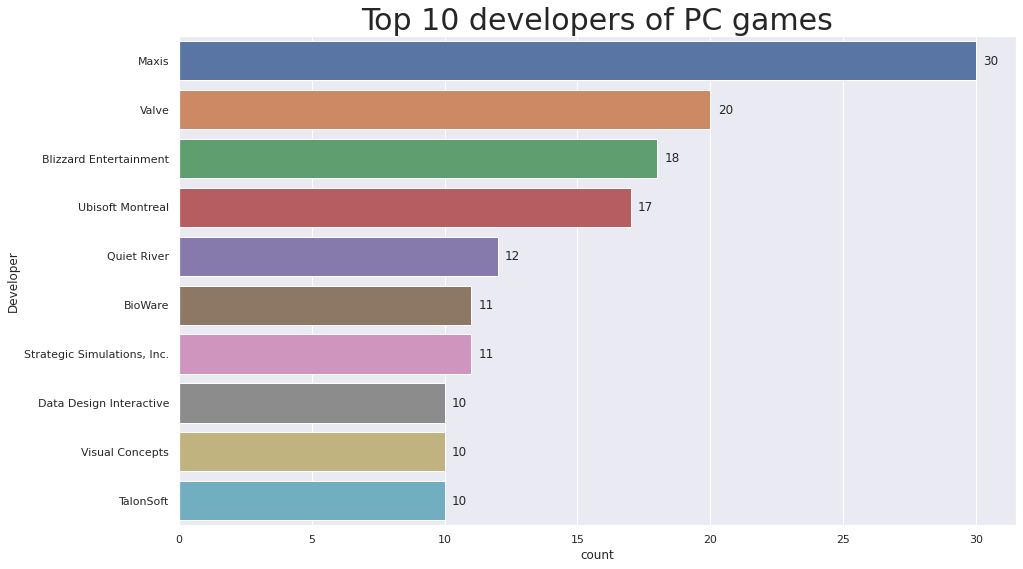

In [16]:
plt.figure(figsize=(15,9))
sns.set_theme(style="darkgrid")
ax=sns.countplot(y = "Developer", order=data['Developer'].value_counts().index[0:10] ,data=data)
#plt.xlabel ("Developer",fontsize =24)
plt.title('Top 10 developers of PC games',
         fontsize =30 
         )
for p in ax.patches:
 ax.annotate(format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), ha = 'center', va = 'center', xytext = (15,-20), textcoords = 'offset points')



**Observation:** There are 571 unique developers, top 5 developers have developed almost one fifth of the PC games. Maxis studio is the leading developer studio with 30 games. Valve, Blizzard and Ubisoft are ranked two, three and fourth place respectively each contribute around 18 games. The difference between first ranking Maxis and second ranking Blizzard is 10 games.

### **To Analyse Years where more Games were released**

**Extracting year from date released**

In [17]:
from pandas import DataFrame,Series
data['year'] = DataFrame(data['Date released'].str[-4:])
data['year']

0       2005
1       2010
2       2012
3       1989
4       2008
        ... 
1053    2018
1054    2018
1055    2017
1056    2018
1057    1991
Name: year, Length: 1044, dtype: object

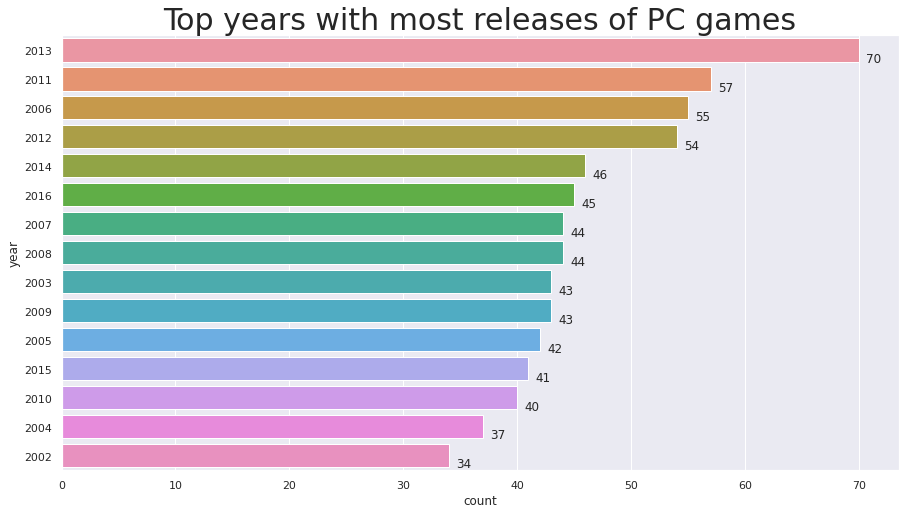

In [18]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
ax=sns.countplot(y = "year", order=data['year'].value_counts().index[0:15] ,data=data)
plt.title('Top years with most releases of PC games',
         fontsize =30 
         )
for p in ax.patches:
 ax.annotate(format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), ha = 'center', va = 'center', xytext = (15,-20), textcoords = 'offset points')

**Observation:** In 2013, 70 PC games were released highest ever. Also from 2003 - 2016, atleast 40 PC games were being released each year. Also the period between 2011-2014 are in top 5 positions of most games released in a year that period may be when PC games releases in peak position. Also, we can't see years 2016 to 2021 in the top 15 list, let us analyse about that period below



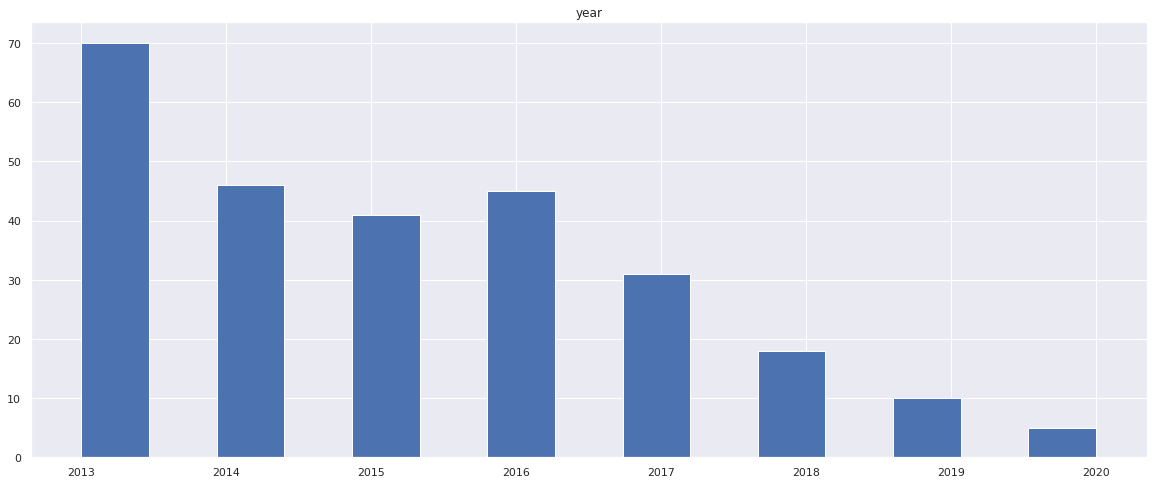

In [19]:
data5= data
data5= data5[~data5.year.isin(['7[1]','lled','6[1]','eta)','TBA','are)','pha)','8[1]','1[2]','9[3]','9[4]','0[5]'])]
data5.year= pd.to_numeric(data5.year)
data_year= data5[data5.year.isin( range(2013,2021))]
data.year=data_year.year.astype(str)
data_year.hist(column='year',bins=15,figsize=(20,8))
data['year'] = DataFrame(data['Date released'].str[-4:])


**Observation:** As we suspected, after 2016 there is a fall in releases of PC games, it maybe due to rise of consoles because consoles like Xbox one X, Xbox one S, Playstation 4 Pro, and Nintendo switch are released on Q4 2016 and Q1 2017.Along with this previous generation consoles saw huge pricedrops.



### **Most used words in Game Titles**

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
textfile = data.Title.astype(str)
tokens = data.Title.apply(word_tokenize)
stop_words = stopwords.words('english')
words = [w for w in tokens if not w in stop_words] 
lemmatizer = WordNetLemmatizer() 
wordlist =  [ item for elem in words for item in elem]
wordlist = [word.lower() for word in wordlist]
# wordlist = [word for word in wordlist if word.isalpha()]
Title_lemmas = [lemmatizer.lemmatize(word) for word in wordlist]
print(Title_lemmas)


LookupError: ignored

In [ ]:
wordcloud = WordCloud(background_color="white",mode="RGB", width = 500, height = 500).generate(" ".join(Title_lemmas))
sns.set_theme(style="ticks")
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.show()

In [ ]:
stop_words = stopwords.words('english')
counts = Counter(words for words in wordlist if not words in stop_words)
print(counts)


In [ ]:
print(counts[':'])

**Observation:**  The symbol **':'** denotes that the title has a caption.
as per our data out of **1044** games, **365** games have captions.

example:
**Call of Duty: Modern Warfare**


In [ ]:
print(counts['2']+counts['ii'])

**Observation:** The symbol **'2' and "ii"** denotes that the title have second installment.
as per our data out of 1044 games, 143 games have second installment.

example: **Age of empires II**


In [ ]:
print(counts['3']+counts['iii'])

**Observation:** The symbol **'3' and "iii"** denotes that the title have third installment.
as per our data out of **1044** games, **77** games have third installment.

example:
**The WItcher 3**



In [ ]:
print(counts['4']+counts['iv'])

**Observation:** The symbol **'4' and "iv"** denotes that the title have fourth installment.
as per our data out of **1044** games, **28** games have fourth installment.

example:
**Battlefeild 4**


In [ ]:
print(counts['5']+counts['v'])

**Observation:** The symbol **'5' and "v"** denotes that the title have fifth installment.
as per our data out of **1044** games, **15** games have fifth installment.

example: 
**Grand Theft Auto V**



In [ ]:
print(counts["'s"])

**Observation:** The symbol **"'s"** denotes that the title has protagonist name in game title or name of author from which game idea has been adapted. as per our data out of **1044** games, **46** games have a contraction.

example: 

**Tom Clancy's Rainbow Seige** - This game is adapted from work of novelist Tom Clancy.

**Lara Croft's Tomb Raider** - Lara Croft is a fictional charecter and main protagonist of this game.

### **Most used terms in Genres**

In [26]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

textfile = data['Genre(s)'].astype(str)
tokens = data['Genre(s)'].apply(word_tokenize)
stop_words = stopwords.words('english')
genres = [w for w in tokens if not w in stop_words] 
lemmatizer = WordNetLemmatizer() 
genrelist =  [ item for elem in genres for item in elem]
genrelist = [word.lower() for word in genrelist]
# wordlist = [word for word in wordlist if word.isalpha()]
genre_lemmas = [lemmatizer.lemmatize(word) for word in genrelist]
print(genre_lemmas)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['visual', 'novel', 'rts', 'first-person', 'shooter', 'top-down', 'shooter', 'first-person', 'shooter', 'sport', ',', 'management', 'action', ',', 'adventure', ',', 'strategy', 'platform', 'sport', 'platformer', 'vehicle', 'simulation', 'sport', 'rts', 'strategy', 'simulation', 'flight', 'simulator', 'puzzle', 'adventure', 'adventure', 'simulation', 'simulation', 'arcade', 'serious', 'game', 'sport', 'sport', 'adventure', 'game', 'mmorpg', 'sport', ',', 'american', 'football', 'racing', 'racing', 'eroge', ',', 'visual', 'novel', 'rpg', 'racing', 'submarine', 'simulator', 'strategy', 'first-person', 'shooter', 'rts', 'adventure', 'mmorpg', 'adventure', 'ga

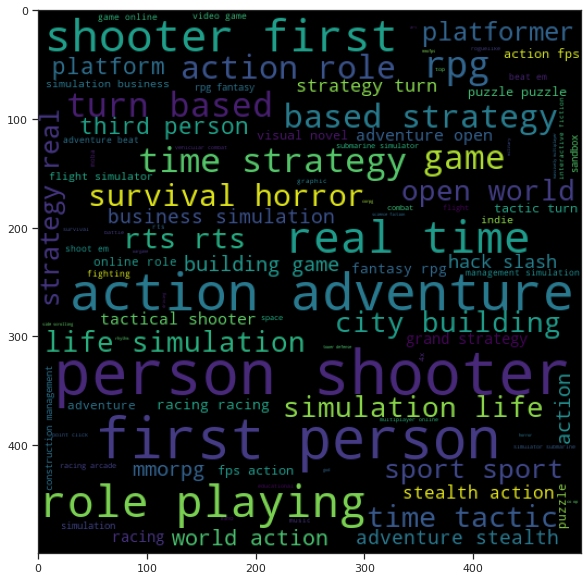

In [27]:
wordcloud = WordCloud(mode="HSV", width = 500, height = 500).generate(" ".join(genre_lemmas))
sns.set_theme(style="ticks")
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.show()

## **Content Based Recommendation System**

**Tfidf: Term Frequency- Inverse Document Frequency** 

*   Term Frequency–Inverse Document Frequency, is  used as a weighting factor in searches of information retrieval, text mining, and user modeling.





**Formula:**

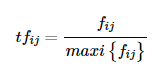

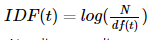

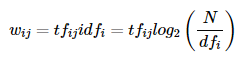

image.png

 N =Total number of docs in collection.

 image.png






**Cosine Similarity:**
* Metric to determinie similarity between two document irrespective of their size. 

* It measures the cosine of the angle between two vectors projected in a multi-dimensional space by using Euclidean Distance.

* It is advantage because even if the two similar documents are far apart by the Euclidean distance because of the size they could still have a smaller angle between them. Smaller the angle, higher the similarity.




**Formula:**

  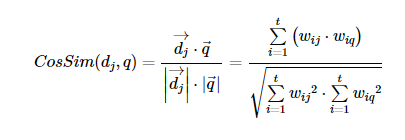

### **Recommendations based on only title**

This Recommendation engine will take a game title as input and recommends based on similar game titles.

In [28]:
tf_vec = TfidfVectorizer(stop_words='english',analyzer='word', min_df=0,ngram_range=(1, 2))
tfidf_matrix = tf_vec.fit_transform(data['Title'])
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_similarity)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [29]:
game_title = data['Title']
indices = pd.Series(data.index, index=data['Title'])
def title_recommendations(titles):
    val = list(enumerate(cosine_similarity[indices[titles]]))
    val = sorted(val, key=lambda k: k[1], reverse=True)[1:11]
    game_indices = [s[0] for s in val]
    return game_title.iloc[game_indices].head(5)



In [30]:

title_recommendations(input('search game'))


search gameThe Sims


897       The Sims
898     The Sims 2
906     The Sims 3
341    Dead Island
729    Pony Island
Name: Title, dtype: object

### **Recommendations based on Genre, Title, Publisher, Developer, year**

As Recommendations based on only Title wont get accurate details, I developed another recommendation engine which will consider Title, Publisher, Genre, Year, Developer attributes. This new recommendation engine can recommend better content as it is taking many factors into consideration.

In [31]:
tf_vec = TfidfVectorizer(stop_words='english',analyzer='word', min_df=0,ngram_range=(1, 2))
tfidf_matrix = tf_vec.fit_transform(data['Genre(s)']+' '+ data['Title']+' '+data['Publisher']+' '+data['Developer']+' '+data['year']+' '+data['Operating system(s)'])
cosine_similarity_genre = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_similarity_genre)

[[1.         0.00615104 0.00748844 ... 0.00621427 0.00614683 0.        ]
 [0.00615104 1.         0.00639145 ... 0.00530393 0.00524637 0.        ]
 [0.00748844 0.00639145 1.         ... 0.00645715 0.00638708 0.        ]
 ...
 [0.00621427 0.00530393 0.00645715 ... 1.         0.87494174 0.02082723]
 [0.00614683 0.00524637 0.00638708 ... 0.87494174 1.         0.0206012 ]
 [0.         0.         0.         ... 0.02082723 0.0206012  1.        ]]


In [32]:
game_titles = data['Title']
game_indices = pd.Series(data.index, index=data['Title'])


In [33]:
def recommendations_title(genres):
    game_titles = data['Title']
    game_indices = pd.Series(data.index, index=data['Title'])
    val = list(enumerate(cosine_similarity_genre[game_indices[genres]]))
    val = sorted(val, key=lambda k: k[1], reverse=True)[1:11]
    game_indices = [s[0] for s in val]
    return game_titles.iloc[game_indices].head(5)


In [34]:
def game_details(gamesearch):
  details = data.iloc[int(gamesearch)]
  titlename= details.Title
  wikipage='https://en.wikipedia.org/wiki/'+titlename
  wikipage = wikipage.replace(' ', '_')
  print(wikipage+'\n')
  return details

In [35]:
recommendations_title(input('search a game '))

search a game The Sims


908    The Sims 3: Into the Future
914    The Sims 3: University Life
906                     The Sims 3
898                     The Sims 2
911            The Sims 3: Seasons
Name: Title, dtype: object

In [36]:
game_details(input('search a game code'))

search a game code908
https://en.wikipedia.org/wiki/The_Sims:_Unleashed



Title                       The Sims: Unleashed
Developer                                 Maxis
Publisher                       Electronic Arts
Genre(s)                        Life simulation
Operating system(s)    Microsoft Windows, macOS
Date released                   January 7, 2002
year                                       2002
Name: 920, dtype: object

# **Secondary Dataset**

Secondary dataset contains video game sales data for game titles, the sales data categorizes into North american region sales, Japan region sales, European region sales, other region sales and global sales.

**Reading Data from CSV file**

In [37]:
salesdata= pd.read_csv("https://openedxvideosa.blob.core.chinacloudapi.cn/videos/MicroMOOC/datasets/MMC_VedioGame/vgsales.csv")

**Display dataset**

In [38]:
salesdata

Rank  ... Global_Sales
0          1  ...        82.74
1          2  ...        40.24
2          3  ...        35.82
3          4  ...        33.00
4          5  ...        31.37
...      ...  ...          ...
16593  16596  ...         0.01
16594  16597  ...         0.01
16595  16598  ...         0.01
16596  16599  ...         0.01
16597  16600  ...         0.01

[16598 rows x 11 columns]

**Drop Unneccessary Columns**

In [39]:
salesdata=salesdata.drop(["Publisher","Year","Genre"],axis=1)


**Renaming column from "Name" to "Title"** 

This is done to merge primary and secondary table based on common Title

In [40]:
salesdata = salesdata.loc[salesdata.Platform=="PC"]
salesdata = salesdata.rename({'Name' : 'Title'}, axis=1)
salesdata

Rank                           Title  ... Other_Sales  Global_Sales
83        84                      The Sims 3  ...        0.71          8.11
137      138               World of Warcraft  ...        0.00          6.28
181      182                      Diablo III  ...        0.62          5.20
194      195      Microsoft Flight Simulator  ...        0.20          5.12
217      218  StarCraft II: Wings of Liberty  ...        0.59          4.83
...      ...                             ...  ...         ...           ...
16558  16561       Pro Evolution Soccer 2008  ...        0.00          0.01
16566  16569                  End of Nations  ...        0.00          0.01
16577  16580                       Damnation  ...        0.00          0.01
16585  16588                          Breach  ...        0.00          0.01
16591  16594             Myst IV: Revelation  ...        0.00          0.01

[960 rows x 8 columns]

**Merging Primary and Secondary dataset**

In [41]:
datamerge=pd.merge(data, salesdata, on="Title", how="inner")
datamerge

datamerge=datamerge.sort_values(['Rank'],ascending=True)
datamerge.insert(loc=0,column="PC_rank",value=range(1,269))
datamerge

PC_rank                           Title  ... Other_Sales Global_Sales
225        1                      The Sims 3  ...        0.71         8.11
257        2               World of Warcraft  ...        0.00         6.28
73         3                      Diablo III  ...        0.62         5.20
205        4  StarCraft II: Wings of Liberty  ...        0.59         4.83
112        5                       Half-Life  ...        0.00         4.12
..       ...                             ...  ...         ...          ...
122      264     Juiced 2: Hot Import Nights  ...        0.00         0.01
121      265                 Icewind Dale II  ...        0.00         0.01
4        266               Act of Aggression  ...        0.00         0.01
194      267       Spore Galactic Adventures  ...        0.00         0.01
60       268                       Damnation  ...        0.00         0.01

[268 rows x 15 columns]

## **Data Analysis**

**To analyse top global sales with years**

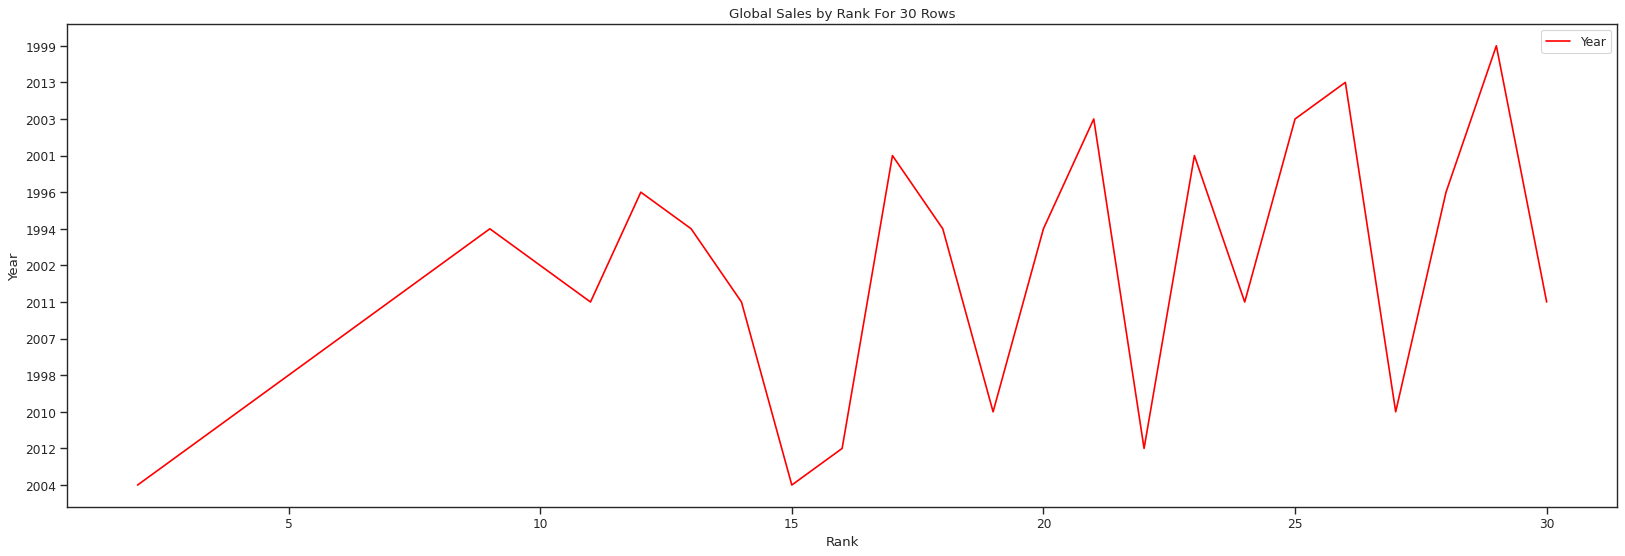

In [42]:
datamerge=datamerge[1:30]
x = datamerge['PC_rank']
y = datamerge['year']
plt.figure(figsize=(25,8), dpi= 80)
plt.plot(x,y, label = 'Year', color = 'red')
plt.xlabel('Rank')
plt.ylabel('Year')
plt.title('Global Sales by Rank For 30 Rows')
plt.legend()
plt.show()

**To analyse how regional sales influence global sales**

Text(0.5, 1.0, 'Stepfield type of Comparision of Global with all Countries')

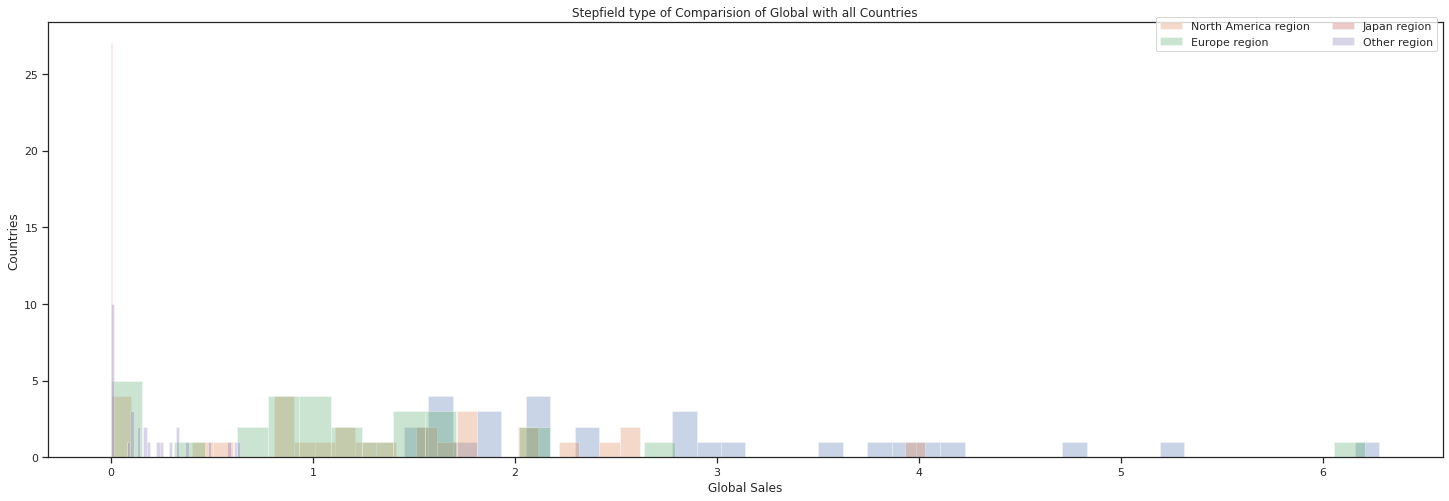

In [43]:
plt.figure(figsize=(25,8))
kwargs = dict(histtype='barstacked', alpha=0.3, bins=40)
plt.hist(datamerge.Global_Sales, **kwargs)
plt.hist(datamerge.NA_Sales, **kwargs,label="North America region")
plt.hist(datamerge.EU_Sales, **kwargs, label="Europe region")
plt.hist(datamerge.JP_Sales, **kwargs, label="Japan region")
plt.hist(datamerge.Other_Sales, **kwargs, label="Other region")
plt.xlabel('Global Sales')
plt.ylabel('Countries')
plt.legend(bbox_to_anchor =(1.0, 1.025), ncol = 2)
plt.title('Stepfield type of Comparision of Global with all Countries')

**Observation:** The cases where global sales crossed 6 million depends on european region and other region sales. Other region is playing a major role for global sales to cross 3 million copies.

## **Prediction Model**

**Mean Square Error(MSE):**
* It measures the average of the squares of the errors.

**Root Mean Square Error(RMSE):**
* RMSE is a standard way to measure the error of a model in predicting quantitative data.

**Mean Absolute Error(MAE):**
* Mean Absolute Error (MAE) is the sum of the absolute difference between actual and predicted values.
* Linear score which means that all the individual differences are weighted equally in the average.

**Relative Absolute Error (RAE):** 
*   It is a way to measure the performance of a predictive model. It’s primarily used in machine learning, data mining, and operations management.
*   The Relative Absolute Error is expressed as a ratio, comparing a mean error (residual) to errors produced by a trivial or naive model.

**Root Relative Squared Error(RRSE):**
*  The relative squared error takes the total squared error and normalizes it by dividing by the total squared error of the simple predictor. By taking the square root of the relative squared error one reduces the error to the same dimensions as the quantity being predicted.












### **Weka Preprocessing**

**Attributes:**


*   Genres
*   Global_sales
*   EU_sales
*   NA_sales
*   JP_sales









Weka contains a collection of visualization tools and algorithms for data analysis and predictive modeling, together with graphical user interfaces for easy access to these functions.

**Downloading merged dataset into a CSV file for using WEKA software**

In [44]:
datamerge.to_csv('datamerge.csv',index=False)

**Loading Dataset to WEKA**

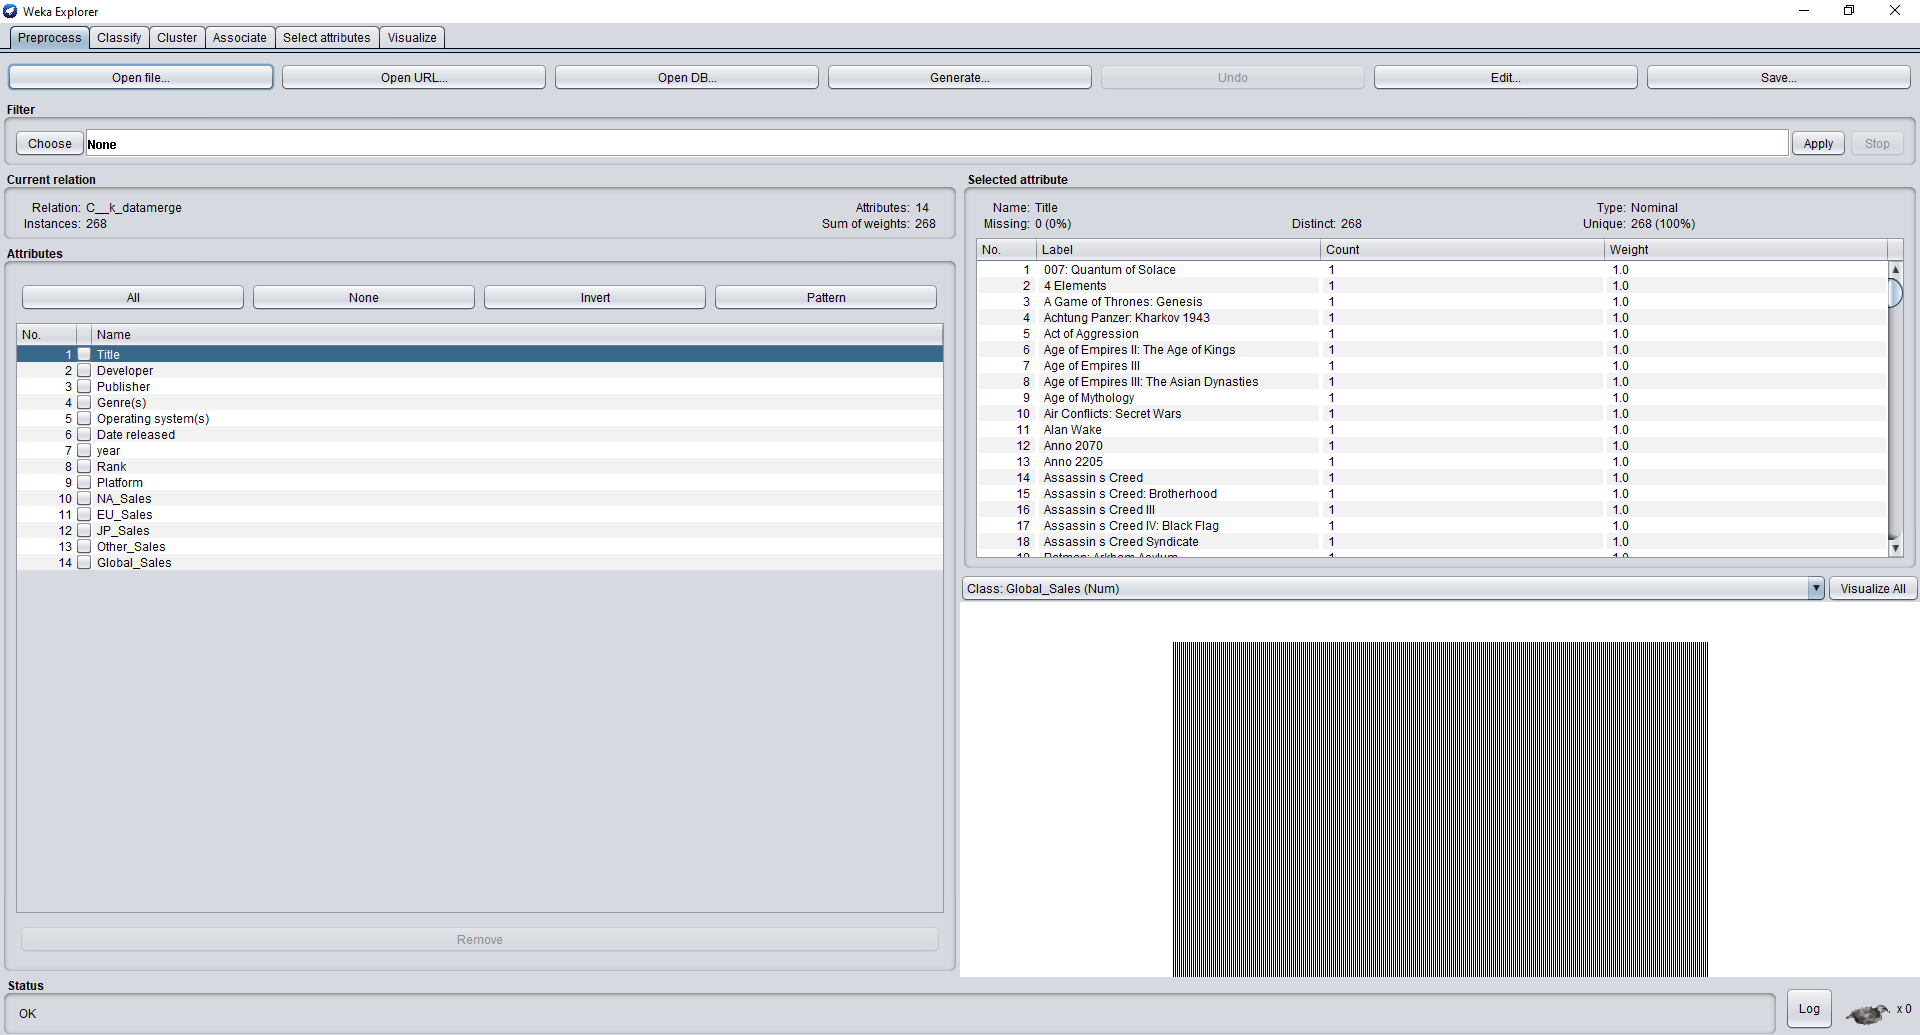

**Preprocessing**

After merging primary and secondary datasets by similar Titles, new dataset has 14 columns. Removed unnecessary columns from dataset and normalise remaining columns.

### **Correlation**

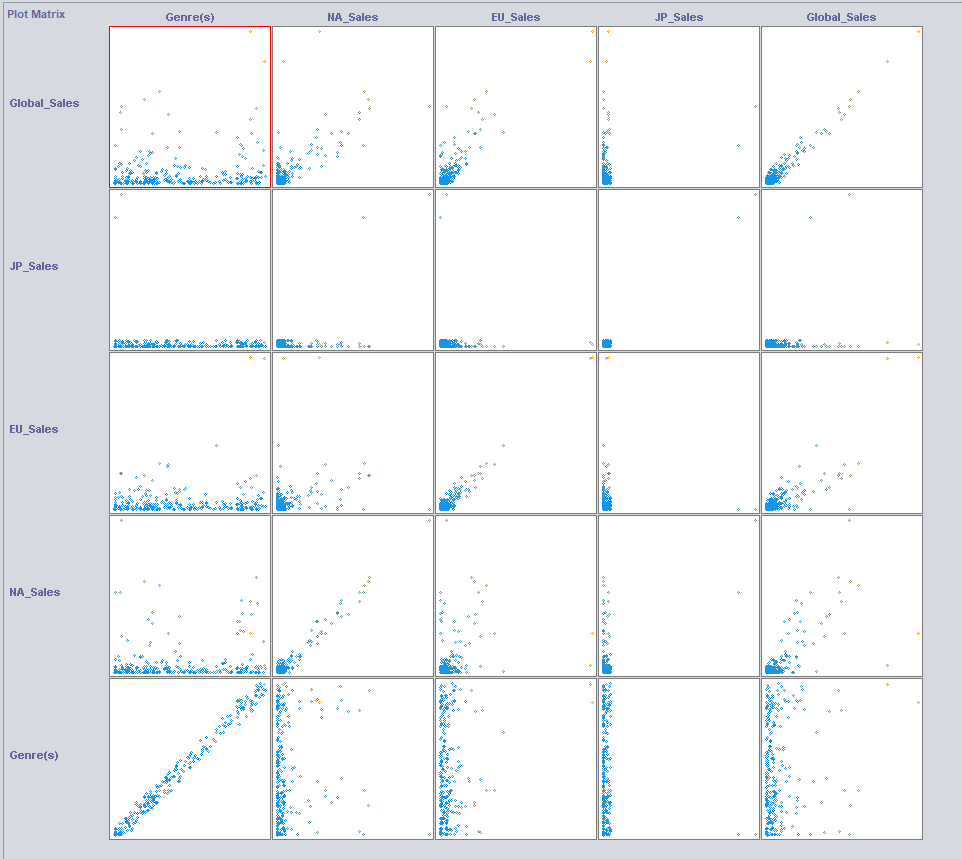

**Attributes:**

Genre(s)

NA_sales

EU_sales

JP_sales

Global_sales

### **Predicting Global Sales with Linear Regression**

**Linear Regression:**

Linear regression models are used to show or predict the relationship between two variables or factors. The factor that is being predicted (the factor that the equation solves for) is called the dependent variable. The factors that are used to predict the value of the dependent variable are called the independent variables.

Here Linear regression uses a ridge parameter which uses Ridge method that adds an L2 penalty equal to the square of the magnitude of coefficients. L2 will not yield sparse models and all coefficients are shrunk by the same factor.

**Parameters**

This model uses **M5 method** for selecting attributes and takes ridge parameter as **1.0E-8**

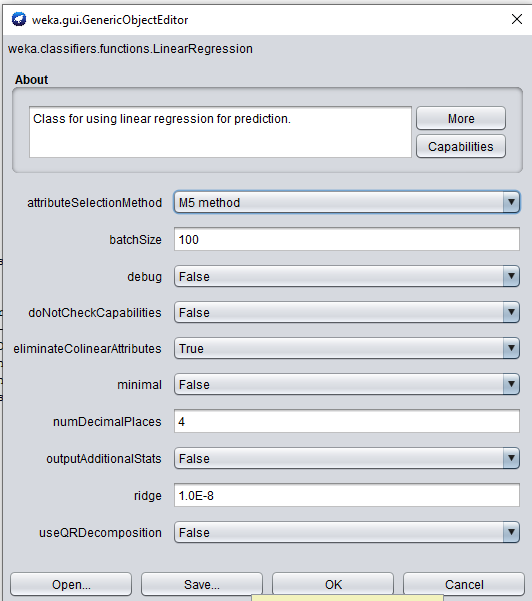

**Runtime Information**

This Linear regression model uses **10 fold cross validation** testing method on total instances **268**

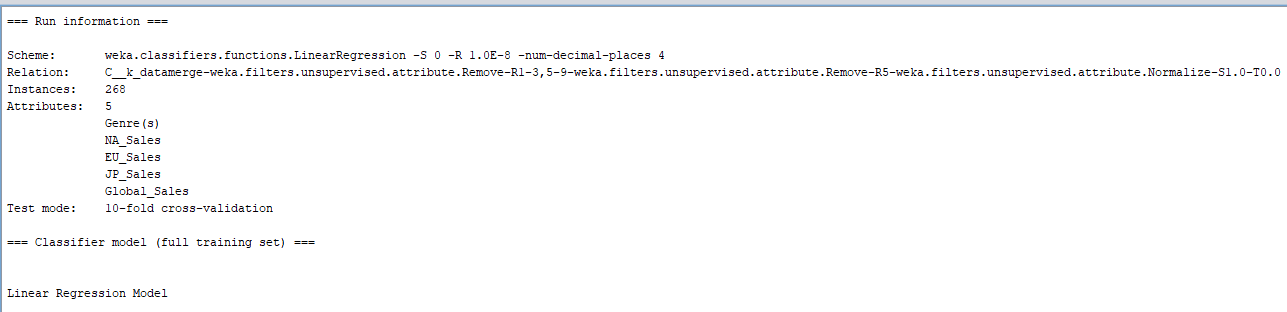

**Cross Validation Summary:**

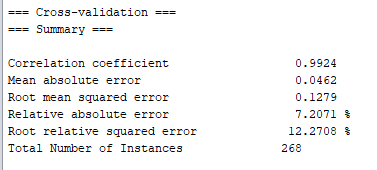

**Model Evaluations:**

Correlation Coefficient = 0.9924

Mean absolute error = 0.0462

Root mean squared error = 0.1279

Relative absolute error = 7.2071 %

Root relative squared error = 12.2708 %

Total Number of Instances = 268

**Graph between Genre(s) and predicted global sales**

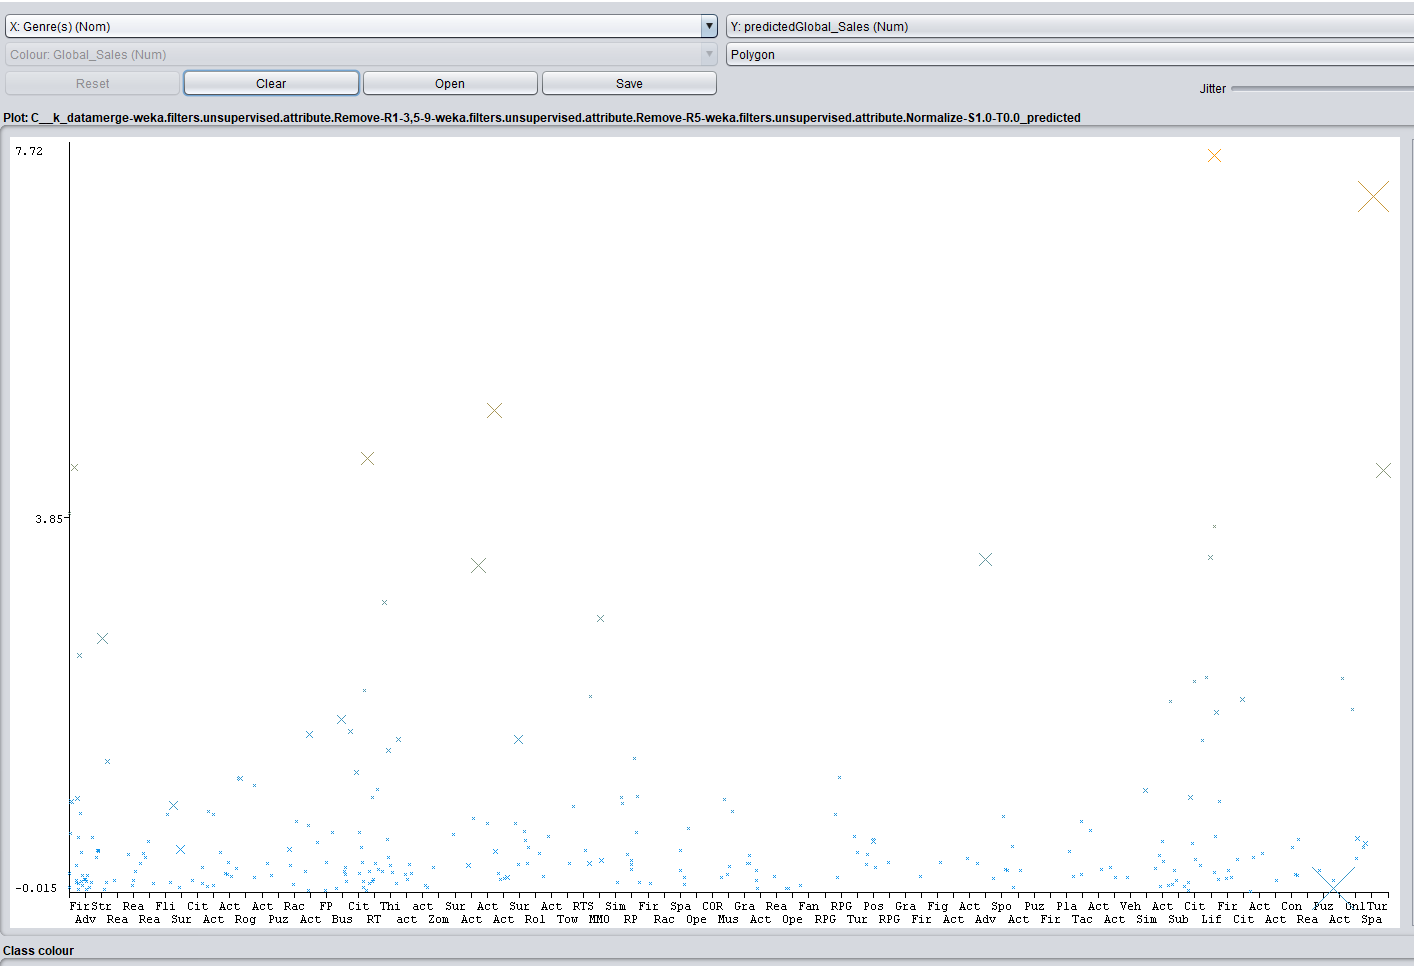

**Example:**

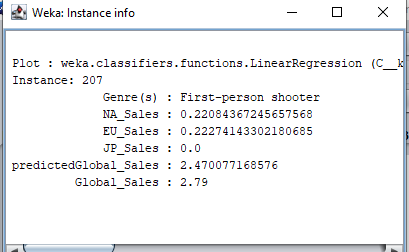

As per the prediction for Genre First Person Shooter, the predicted global sales are 2.47 million copies which means global sales may decrease from previous global sales of 2.79 million copies

### **Predicting Global Sales with Additive Regression**

**Additive Regression**

Meta classifier that enhances the performance of a regression base classifier. Each iteration fits a model to the residuals left by the classifier on the previous iteration. Prediction is accomplished by adding the predictions of each classifier. 

**Parameters**

This model uses below parameters

Classifier: **Decision Stump**

Number of Iterations : **10**

Shrinkage factor : **1.0**

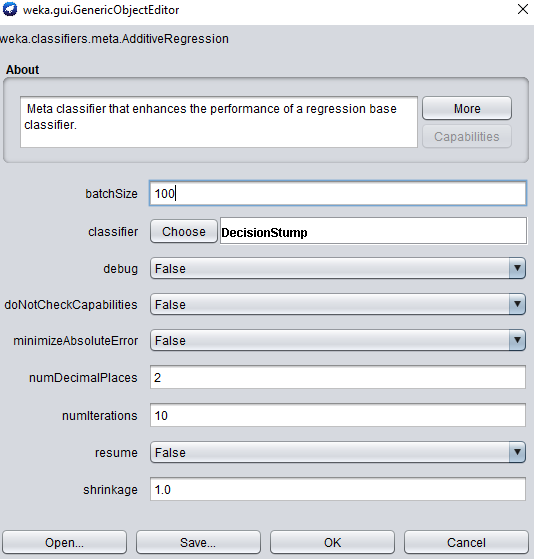

**Runtime Information**

This model uses **10 fold cross validation** testing method on total instances **268**

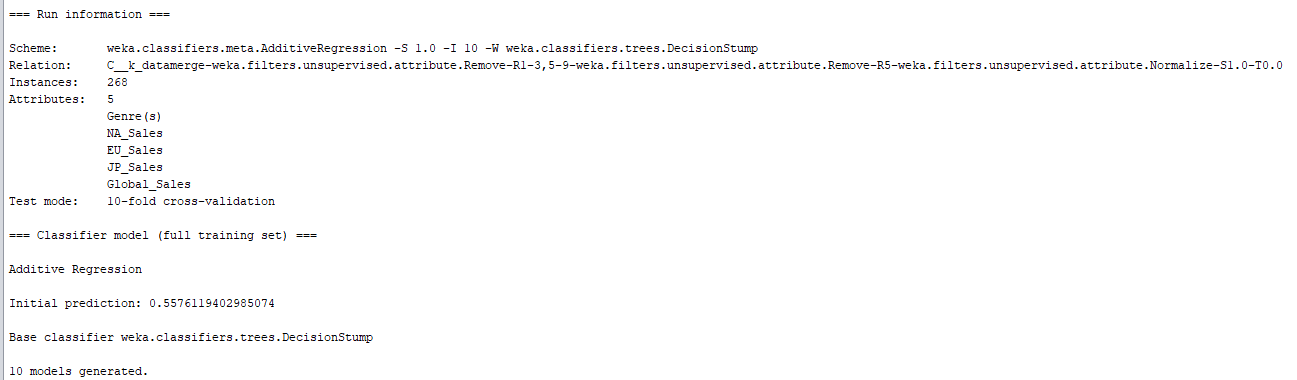

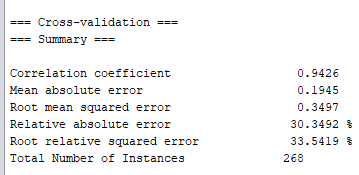

**Model Evaluation**:

Correlation Coefficient = 0.9426

Mean absolute error = 0.1945

Root mean squared error = 0.3497

Relative absolute error = 30.3492 %

Root relative squared error = 33.5419 %

Total Number of Instances = 268

**Graph between Genre(s) and predicted global sales**

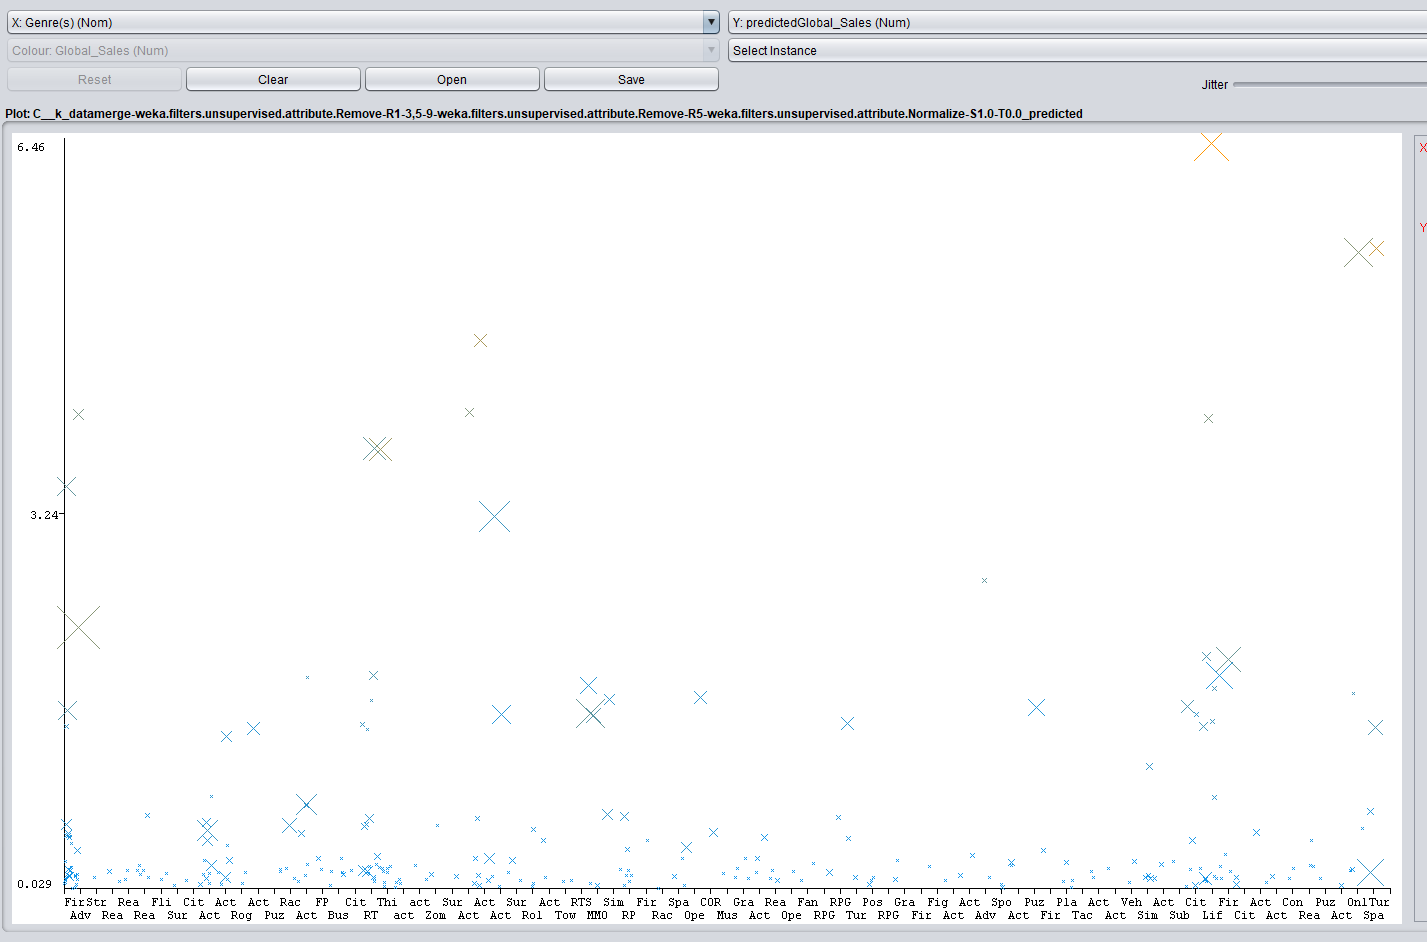

**Example:**

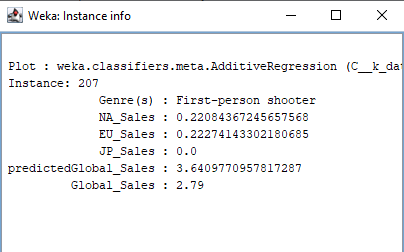

As per the prediction for Genre First Person Shooter, global sales is 2.79 million copies and predicted global sales are 3.64 million copies which means global sales may increase from previous global sales.

### **Comparision between Linear Regression model and Additive regression model**

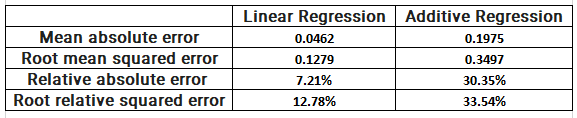

RMSE of Linear regression is very less so, the predictions of linear regression model are more accurate.

#**Summary**

As per Data Analysis on primary dataset, top 5 of each column contribute to 15-20% of the total games.

1) top 6 publishers contribute 20% of the all PC video games released

2)one-fourth of total games belong to top 5 genres

3) top 5 developers have developed almost one fifth of the PC games

4)the period between 2011-2014 are in top 5 positions of most games released in a year and after 2016 there are game releases declined

5)Top 3 most words used in game title are "age","war" and "sim".

6) And as charecters 'ii' or 'iii' show that many successful games have a sequel and the sequels length goes as high as 6.

# **Results and** **Evaluations**

## **Recommendation Model**

Input:  Title of game

Output: top 5 Similar games

Method: Using TfIdf vectorization and cosine similarity

**Recommendations based on Title**

In [45]:
title_recommendations('007: Licence to Kill')


2                    007 Legends
4         007: Quantum of Solace
556    James Bond 007: Nightfire
0                        _summer
1                         0 A.D.
Name: Title, dtype: object

**Recommendations based on all attributes**

In [46]:
recommendations_title('007: Licence to Kill')

2                 007 Legends
385          Dragons of Flame
4      007: Quantum of Solace
20        3D Construction Kit
21     3D Construction Kit II
Name: Title, dtype: object

## **Prediction Model**

### **Linear Regression**

**Evaluation Metrics**


Mean absolute error = 0.0462

Root mean squared error = 0.1279

Relative absolute error = 7.2071 %

Root relative squared error = 12.2708 %
  

### **Additive Regression**

**Evaluation Metrics**


Mean absolute error = 0.1945

Root mean squared error = 0.3497

Relative absolute error = 30.3492 %

Root relative squared error = 33.5419 %
  

# **Conclusion**

**RECOMMENDATION SYSTEM**: Given game title to recommend games similar to .

Advantages:
1. Recommends most relevant games as per user input.
2. Helps users to find new Game with relavant and desired categories.
3. Can search for new game details with ID after recommendations.

**PREDICTION SYSTEM**: Given video game sales data, model to predict the global sales of each genre is developed.

Advantages:
1. Own model to predict global sales and cross verify with current global sales.
2. Can predict global sales for each genre.



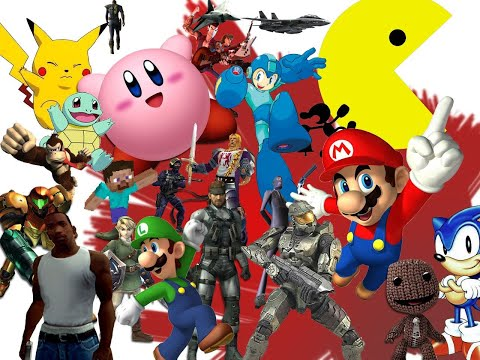

In [47]:
from IPython.display import YouTubeVideo
YouTubeVideo('GNRbGMG8pJE')

# **Future Work**

1)To develop Video Game recommendation system based on Hybrid recommendation model combining collaborative filtering and content-based filtering.

2) To increase recommendation of games for consoles.

# **End Goal**

The end goal of this project is to


1.   Build a recommendation system for PC video games based on Genre, Title, Publisher, Developer, year released.






# **References**




1.   https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
2.   https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d741433.  
3.https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
4.  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
5.  https://www.kdnuggets.com/2019/09/machine-learning-recommender-systems.html
6. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/
7. https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.rename_axis.html
8. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
9. https://datagy.io/python-extract-tables-from-webpage/
10. https://en.wikipedia.org/


